# opens the log files and gets the years of data per category

In [20]:
import os
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def contains_oom_error(file_path):
    """Checks if the log file contains an OOM (Out of Memory) error."""
    with open(file_path, "r") as file:
        for line in file:
            if "oom_kill" in line.lower() or "OOM Killed" in line or "error: Detected" in line:
                return True  # OOM error detected, skip this file
    return False
    
def extract_data_from_log(file_path):
    """Extracts category and years from a log file."""
    data = []
    station_id = None  # Variable to store the station ID

    with open(file_path, "r") as file:
        for line in file:
            # Extract station ID (Assumes it's the first uppercase word in the file)
            match_station = re.match(r"^[A-Z0-9_]+$", line.strip())
            if match_station:
                station_id = match_station.group(0)
                continue  # Move to the next line

            # Extract category and years
            match_data = re.match(r"(\S+)\s+(\S+)\s+:\s+(\d+)\s+years", line.strip())
            if match_data:
                category = match_data.group(1)
                subcategory = match_data.group(2)
                years = int(match_data.group(3))
                data.append([station_id, category, subcategory, years])

    return data

def process_logs(folder_path):
    """Processes all .out log files in the specified folder, skipping OOM error logs."""
    log_files = glob.glob(os.path.join(folder_path, "*.out"))
    all_data = []

    oom_count = 0
    for file_path in log_files:
        # Skip file if it contains an OOM error
        if contains_oom_error(file_path):
            oom_count += 1
            print(f"{oom_count:02}. Skipping {file_path} due to OOM error.")
            continue

        log_data = extract_data_from_log(file_path)
        all_data.extend(log_data)

    # Convert to DataFrame
    df = pd.DataFrame(all_data, columns=["Station", "Category", "Subcategory", "Years"])
    return df

In [22]:
# Set the path to the folder containing log files
folder_path = "./logs/forcing_check_1"

# Process logs and create a DataFrame
df = process_logs(folder_path)

01. Skipping ./logs/forcing_check_1/slurm-2457743_630.out due to OOM error.
02. Skipping ./logs/forcing_check_1/slurm-2457743_1132.out due to OOM error.
03. Skipping ./logs/forcing_check_1/slurm-2457743_599.out due to OOM error.
04. Skipping ./logs/forcing_check_1/slurm-2457743_741.out due to OOM error.
05. Skipping ./logs/forcing_check_1/slurm-2457743_718.out due to OOM error.
06. Skipping ./logs/forcing_check_1/slurm-2457743_747.out due to OOM error.
07. Skipping ./logs/forcing_check_1/slurm-2457743_219.out due to OOM error.
08. Skipping ./logs/forcing_check_1/slurm-2457743_539.out due to OOM error.
09. Skipping ./logs/forcing_check_1/slurm-2457743_552.out due to OOM error.
10. Skipping ./logs/forcing_check_1/slurm-2457743_1094.out due to OOM error.
11. Skipping ./logs/forcing_check_1/slurm-2457743_230.out due to OOM error.
12. Skipping ./logs/forcing_check_1/slurm-2457743_427.out due to OOM error.
13. Skipping ./logs/forcing_check_1/slurm-2457743_222.out due to OOM error.
14. Skippi

In [23]:
def plot_year_distributions(df):
    """Plots the distribution of years for each category + subcategory in a 4-row, 3-column layout."""
    # Create a MultiIndex for easy grouping
    df.set_index(["Category", "Subcategory"], inplace=True)

    # Get unique categories and subcategories
    unique_categories = df.index.get_level_values(0).unique()
    unique_subcategories = df.index.get_level_values(1).unique()

    # Define grid size
    nrows = 4  # Fixed 4 rows
    ncols = 3  # Fixed 3 columns per row
    total_plots = len(unique_categories) * len(unique_subcategories)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10), sharex=True, sharey=True)

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    plot_idx = 0
    for category in unique_categories:
        for subcategory in unique_subcategories:
            if (category, subcategory) in df.index:
                subset = df.loc[(category, subcategory)]  # Select relevant data
                ax = axes[plot_idx]  # Select corresponding subplot
                ax.hist(subset["Years"], bins=10, alpha=0.7, edgecolor="black")
                ax.set_title(f"{category} - {subcategory}")
                ax.set_xlabel("Years")
                ax.set_ylabel("Frequency")
                plot_idx += 1

    # Hide unused subplots if any
    for i in range(plot_idx, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1409549/3306693526.py:23: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (category, subcategory) in df.index:
/tmp/ipykernel_1409549/3306693526.py:24: PerformanceWarning: indexing past lexsort depth may impact performance.
  subset = df.loc[(category, subcategory)]  # Select relevant data


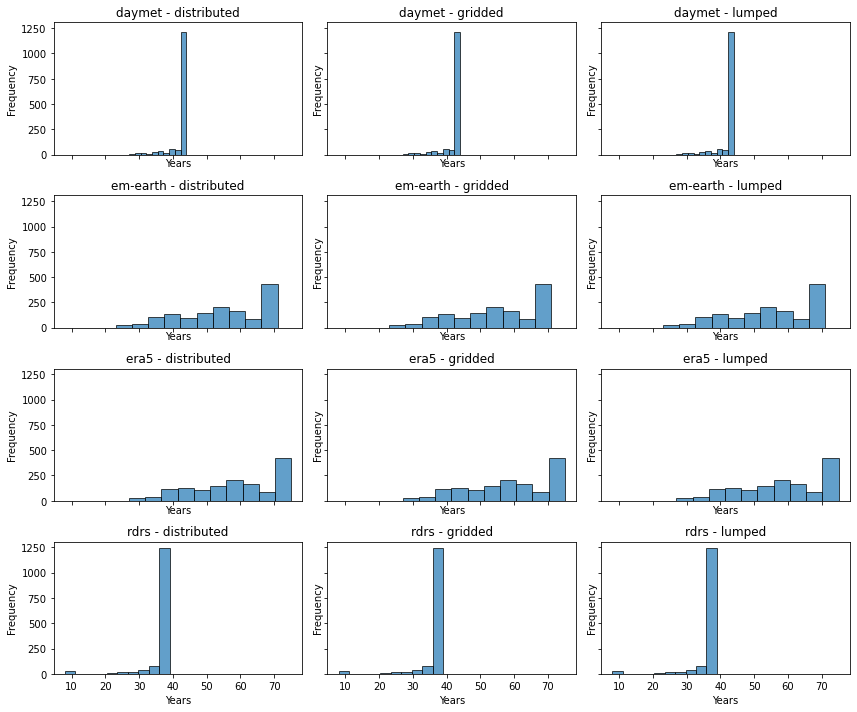

In [24]:
# Call the function with the extracted data
plot_year_distributions(df)